# Introduction

Dataset diambil dari https://www.kaggle.com/andrewmvd/heart-failure-clinical-data. Dataset tersebut memuat informasi penderita penyakit jantung dan apakah masih hidup atau tidak. Terdapat 13 fitur yaitu :

1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi
di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up


# Import Library

In [74]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
%matplotlib inline

# Data Loading

In [2]:
df=pd.read_csv('d:Hactiv8/dataset/heart_failure_clinical_records_dataset.csv')
pd.set_option('display.max.columns', None)

In [3]:
df.shape

(299, 13)

In [4]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Meskipun semua data bertipe numerik namun terdapat beberapa fitur kategori

In [6]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Fitur kategorikal :
- anaemia
0 : no, 1 : yes
- diabetes
0: no, 1 : yes
- high_blood_pressure
0 : no, 1: yes
- sex
0: female, 1:male
- smoking
0: no, 1: yes
- DEATH_EVENT
0 : tidak meninggal saat masa follow up, 1 : meninggal saat follow up


In [7]:
df.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

Tidak terdapat missing value pada dataset tersebut

In [8]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Data Cleaning

In [9]:
df.rename(columns={'DEATH_EVENT':'death_event','high_blood_pressure':'hypertension'}, inplace=True)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


dataset tidak memiliki missing value dan sudah rapi sehingga proses cleaning data dapat dilewati atau dalam projek ini hanya merename kolom 'DEATH_EVENT' dan 'high_blood_pressure'

# Data Exploration

## Data Kategorikal

In [10]:
#melihat death_event berdasarkan kelompok usia
death_event_40s=df.loc[df['age']<50,'death_event'].value_counts()
death_event_50s=df.loc[df['age']<60,'death_event'].value_counts()
death_event_60s=df.loc[df['age']<70,'death_event'].value_counts()
death_event_70s=df.loc[df['age']<80,'death_event'].value_counts()
death_event_80s=df.loc[df['age']<90,'death_event'].value_counts()
death_event_90s=df.loc[df['age']<100,'death_event'].value_counts()
#membuat data frame dari fitur death_event berdasarkan pengelompokan usia
df_deathByAge=pd.DataFrame({'40s':death_event_40s,'50s':death_event_50s,
             '60s':death_event_60s,'70s':death_event_70s,
             '80s':death_event_80s,'90s':death_event_90s})
df_deathByAge=df_deathByAge.transpose()
df_deathByAge

,0,1
40s,36,11
50s,98,31
60s,164,58
70s,196,78
80s,202,91
90s,203,96


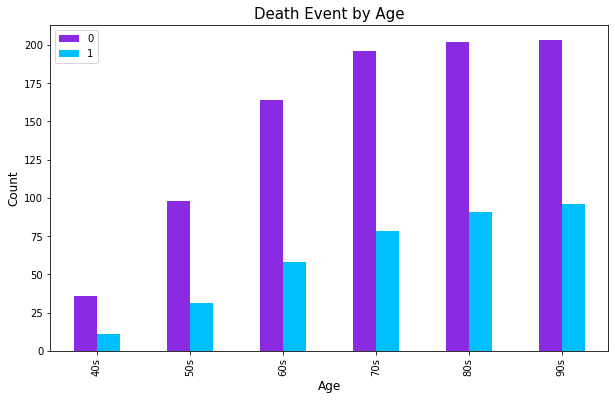

In [11]:
#visualisasi data death_event berdasarkan kelompok usia
df_deathByAge.plot(kind='bar', figsize=(10,6),
                  color=['blueviolet','deepskyblue'])
plt.title('Death Event by Age', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

dari bar chart tersebut tampak bahwa semakin tinggi usia seseorang semakin rentan terkena penyakit jantung dan semakin besar juga jumlah meninggalnya. 

In [12]:
def color():
    for x,y in matplotlib.colors.cnames.items():
        print(x,y)

In [13]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [14]:
#jumlah yang meninggal dan tidak meninggal berdasarkan gender
female=df[df['sex']==0]
male=df[df['sex']==1]
male_not_survived=len(male[male['death_event']==1])
female_not_survived=len(female[female['death_event']==1])
male_survived=len(male[male['death_event']==0])
female_survived=len(female[female['death_event']==0])
df_survivalBySex=pd.DataFrame({'Keterangan':['male_not_survived',
                                           'female_not_survived',
                                           'male_survived',
                                           'female_survived'],
                             'Number': [male_not_survived,female_not_survived,
                                       male_survived,female_survived]})
df_survivalBySex=df_survivalBySex.set_index('Keterangan')
df_survivalBySex

,Number
Keterangan,
male_not_survived,62
female_not_survived,34
male_survived,132
female_survived,71


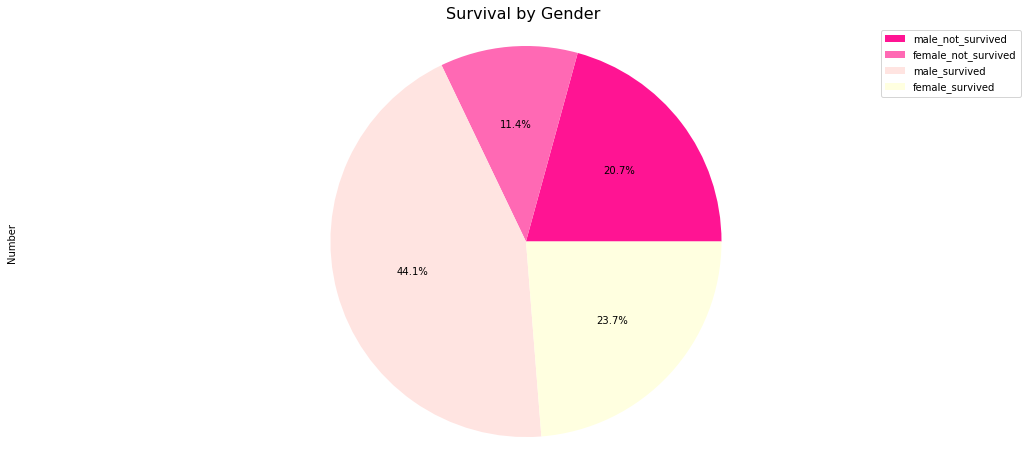

In [15]:
#membuat pie chart dari data survival berdasar gender
color_list=['deeppink','hotpink','mistyrose','lightyellow']
df_survivalBySex['Number'].plot(kind='pie', figsize=(18,8),
                               autopct='%1.1f%%',
                                colors=color_list,labels=None)
plt.title('Survival by Gender', fontsize=16)
plt.axis('equal')
plt.legend(labels=df_survivalBySex.index)

Terdapat lebih banyak penderita penyakit jantung dengan gender laki-laki dibandingkan perempuan demikian juga jumlah laki-laki yang meninggal akibat penyakit jantung lebih banyak dibandingkan perempuan.

In [16]:
male_smoking=len(male[male['smoking']==1])
female_smoking=len(female[female['smoking']==1])
male_not_smoking=len(male[male['smoking']==0])
female_not_smoking=len(female[female['smoking']==0])
df_smokingByGender=pd.DataFrame({'keterangan':['male_smoking','female_smoking','male_not_smoking','female_not_smoking'],
                                'Number':[male_smoking,female_smoking,male_not_smoking,female_not_smoking]})
df_smokingByGender=df_smokingByGender.set_index('keterangan')
df_smokingByGender

,Number
keterangan,
male_smoking,92
female_smoking,4
male_not_smoking,102
female_not_smoking,101


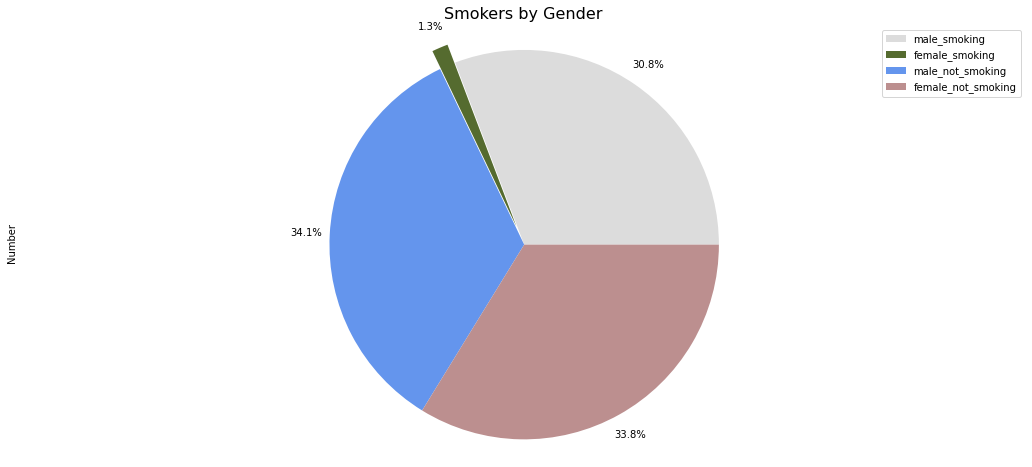

In [17]:
#pie chart smoking by gender
color_list2=['gainsboro','darkolivegreen','cornflowerblue','rosybrown']
explode_list=[0,0.1,0,0]
df_smokingByGender['Number'].plot(kind='pie', labels=None,
                                  figsize=(18,8),autopct='%1.1f%%',
                                 colors=color_list2,
                                 explode=explode_list,
                                 pctdistance=1.12)
plt.title('Smokers by Gender', fontsize=16)
plt.axis('equal')
plt.legend(labels=df_smokingByGender.index)

Perokok dengan jenis kelamin perempuan sangatlah sedikit yaitu hanya 1.3% sementara perokok dengan jenis kelamin laki-laki mencapai 30.8%. Informasi tersebut mengindikasikan merokok meningkatkan kemungkinan kematian akibat penyakit jantung. Untuk memastikan hal tersebut akan dibuat juga grafik yang menunjukan jumlah yang meninggal maupun tidak berdasarkan perokok dan yang bukan perokok

In [18]:
#jumlah yang merokok
len(df[df['smoking']==1])

96

In [19]:
df_deathBySmoking=df.groupby(['smoking','death_event'])['death_event'].count().unstack()
df_deathBySmoking

death_event,0,1
smoking,,
0,137,66
1,66,30


In [20]:
survive=df[df['death_event']==0]
death=df[df['death_event']==1]
survive_smoking=len(survive[survive['smoking']==1])
death_smoking=len(death[death['smoking']==1])
survive_not_smoking=len(survive[survive['smoking']==0])
death_not_smoking=len(death[death['smoking']==0])
df_deathBySmoking2=pd.DataFrame({'keterangan':['survive_smoking','death_smoking','survive_not_smoking','death_not_smoking'],
                                'Number':[survive_smoking,death_smoking,survive_not_smoking,death_not_smoking]})
df_deathBySmoking2=df_deathBySmoking2.set_index('keterangan')
df_deathBySmoking2

,Number
keterangan,
survive_smoking,66
death_smoking,30
survive_not_smoking,137
death_not_smoking,66


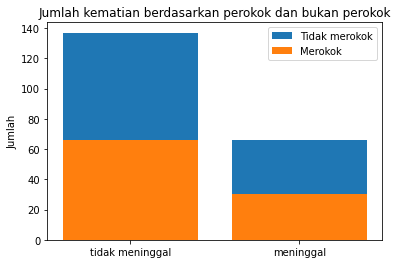

In [21]:
#visualisasi dalam bar chart
fig, ax=plt.subplots()
#plot pertama(dibawah) yaitu orang yang tidak merokok
ax.bar(df_deathBySmoking.index, df_deathBySmoking[0],label='Tidak merokok')
#plot bar diatas yaitu orang yang merkok
ax.bar(df_deathBySmoking.index, df_deathBySmoking[1], label='Merokok')
#menetapkan xticks, ylabel, dan judul
ax.set_xticks((0,1))
ax.set_xticklabels(['tidak meninggal','meninggal'])
ax.set_ylabel('Jumlah')
ax.set_title('Jumlah kematian berdasarkan perokok dan bukan perokok')
ax.legend()

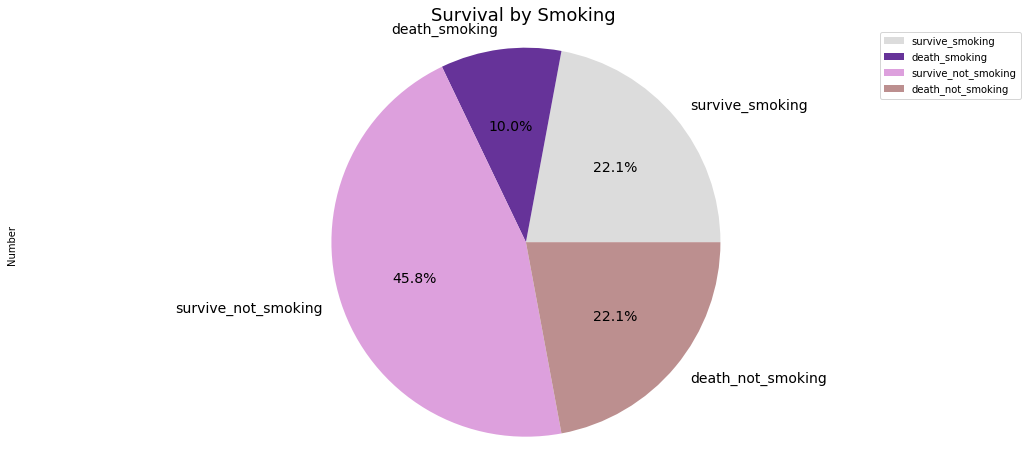

In [22]:
#pie chart death event by smoking
color_list2=['gainsboro','rebeccapurple','plum','rosybrown']
df_deathBySmoking2['Number'].plot(kind='pie',
                                  figsize=(18,8),autopct='%1.1f%%',
                                 colors=color_list2,
                                 fontsize=14)
plt.title('Survival by Smoking', fontsize=18)
plt.axis('equal')
plt.legend(labels=df_deathBySmoking2.index)

Dari pie chart dan bar chart tersebut dapat dilihat bahwa orang yang tidak merokok lebih banyak yang tidak meninggal yaitu sebanyak 45.8%  namun merokok tidak bisa disimpulkan sebagai penyebab utama kematian dari penyakit jantung karena hanya ada 96 orang dari 299 data orang yang merokok dan mengidap penyakit jantung dengan persentase kematian sebesar 10%

In [23]:
#jumlah penderita anemia
anemia=len(df[df['anaemia']==1])
not_anemia=len(df[df['anaemia']==0])
#jumlah penderita diabetes
diabetes=len(df[df['diabetes']==1])
not_diabetes=len(df[df['diabetes']==0])
#jumlah penderita hipertensi
hypertension=len(df[df['hypertension']==1])
not_hypertension=len(df[df['hypertension']==0])
#membuat dataframe dari jumlah penderita diabetes, anemia, dan hipertensi
df_anemia_diabet_hyper=pd.DataFrame(
    {'keterangan':['anemia','diabetes','hipertensi'],
     'no':[not_anemia,not_diabetes,not_hypertension],
    'yes':[anemia,diabetes,hypertension],
    })
#mensetting index
df_anemia_diabet_hyper=df_anemia_diabet_hyper.set_index('keterangan')
df_anemia_diabet_hyper

,no,yes
keterangan,,
anemia,170,129
diabetes,174,125
hipertensi,194,105


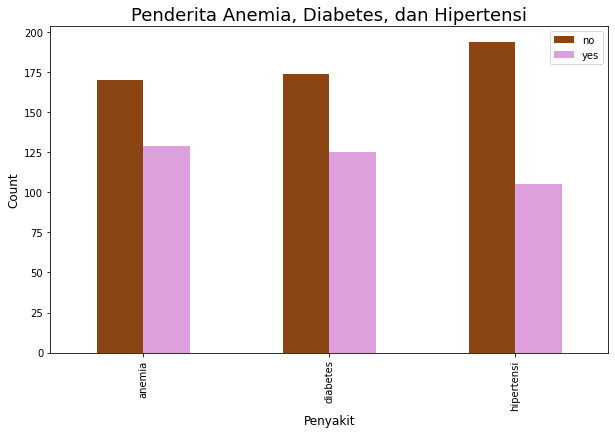

In [24]:
#visualisasi jumlah penderita anemia, diabetes, hipertensi
df_anemia_diabet_hyper.plot(kind='bar', figsize=(10,6),
                  color=['saddlebrown','plum'])
plt.title('Penderita Anemia, Diabetes, dan Hipertensi', fontsize=18)
plt.xlabel('Penyakit', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

Penderita penyakit jantung paling banyak memiliki riwayat penyakit anemia diikuti diabetes dan hipertensi. Selanjutnya akan dilihat apakah orang yang tidak memiliki riwayat ketiga penyakit tersebut lebih banyak yang survive dibanding yang memiliki riwayat penyakit tersebut.

In [25]:
#mengambil data pasien yang memiliki riwayat ketiga penyakit tersebut
df_ADH=df.loc[(df['anaemia']==1) & (df['diabetes']==1) & (df['hypertension']==1)]
death_ADH=len(df_ADH[df_ADH['death_event']==1])
not_death_ADH=len(df_ADH[df_ADH['death_event']==0])
print('meninggal :',death_ADH)
print('tidak meninggal :', not_death_ADH)

meninggal : 6
tidak meninggal : 11


In [26]:
#mengambil data pasien yang memiliki riwayat penyakit anemia dan diabetes
df_AD=df.loc[(df['anaemia']==1) & (df['diabetes']==1)]
death_AD=len(df_AD[df_AD['death_event']==1])
not_death_AD=len(df_AD[df_AD['death_event']==0])
print('meninggal :',death_AD)
print('tidak meninggal :', not_death_AD)

meninggal : 18
tidak meninggal : 35


In [27]:
#mengambil data pasien yang memiliki riwayat penyakit anemia dan hipertensi
df_AH=df.loc[(df['anaemia']==1)  & (df['hypertension']==1)]
death_AH=len(df_AH[df_AH['death_event']==1])
not_death_AH=len(df_AH[df_AH['death_event']==0])
print('meninggal :',death_AH)
print('tidak meninggal :', not_death_AH)

meninggal : 19
tidak meninggal : 29


In [28]:
#mengambil data pasien yang memiliki riwayat penyakit diabetes dan hipertensi
df_DH=df.loc[(df['diabetes']==1) & (df['hypertension']==1)]
death_DH=len(df_DH[df_DH['death_event']==1])
not_death_DH=len(df_DH[df_DH['death_event']==0])
print('meninggal :',death_DH)
print('tidak meninggal :', not_death_DH)

meninggal : 17
tidak meninggal : 26


In [29]:
#mengambil data pasien yang memiliki riwayat penyakit anemia
df_A=df.loc[(df['anaemia']==1) ]
death_A=len(df_A[df_A['death_event']==1])
not_death_A=len(df_A[df_A['death_event']==0])
print('meninggal :',death_A)
print('tidak meninggal :', not_death_A)

meninggal : 46
tidak meninggal : 83


In [30]:
#mengambil data pasien yang memiliki riwayat penyakit diabetes
df_D=df.loc[(df['diabetes']==1)]
death_D=len(df_D[df_D['death_event']==1])
not_death_D=len(df_D[df_D['death_event']==0])
print('meninggal :',death_D)
print('tidak meninggal :', not_death_D)

meninggal : 40
tidak meninggal : 85


In [31]:
#mengambil data pasien yang memiliki riwayat penyakit hipertensi
df_H=df.loc[(df['hypertension']==1)]
death_H=len(df_H[df_H['death_event']==1])
not_death_H=len(df_H[df_H['death_event']==0])
print('meninggal :',death_H)
print('tidak meninggal :', not_death_H)

meninggal : 39
tidak meninggal : 66


In [32]:
#Membuat dataframe baru berdasarkan informasi diatas
keterangan=['Anemia, Diabetes, dan Hipertensi',
           'anemia dan diabetes',
           'anemia dan hipertensi',
           'diabetes dan hipertensi',
           'anemia','diabetes','hipertensi']
meninggal=[death_ADH, death_AD, death_AH, death_DH,
           death_A,death_D,death_H]
tidak_meninggal=[not_death_ADH, not_death_AD,
                not_death_AH, not_death_DH,
                not_death_A, not_death_D, not_death_H]
ADH_df=pd.DataFrame({'keterangan':keterangan,'Meninggal':meninggal,
             'Tidak meninggal':tidak_meninggal})
persen=pd.DataFrame({'meninggal(%)':round((ADH_df['Meninggal']/(ADH_df['Meninggal']+ADH_df['Tidak meninggal']))*100,2)})
ADH_df=pd.concat([ADH_df,persen], axis=1)
ADH_df

,keterangan,Meninggal,Tidak meninggal,meninggal(%)
0,"Anemia, Diabetes, dan Hipertensi",6,11,35.29
1,anemia dan diabetes,18,35,33.96
2,anemia dan hipertensi,19,29,39.58
3,diabetes dan hipertensi,17,26,39.53
4,anemia,46,83,35.66
5,diabetes,40,85,32.00
6,hipertensi,39,66,37.14


In [33]:
#mengurutkan berdasarkan persentase kematian dari tertinggi ke terendah
ADH_df.sort_values(by='meninggal(%)', ascending=False)

,keterangan,Meninggal,Tidak meninggal,meninggal(%)
2,anemia dan hipertensi,19,29,39.58
3,diabetes dan hipertensi,17,26,39.53
6,hipertensi,39,66,37.14
4,anemia,46,83,35.66
0,"Anemia, Diabetes, dan Hipertensi",6,11,35.29
1,anemia dan diabetes,18,35,33.96
5,diabetes,40,85,32.00


Berdasarkan tabel diatas didapat informasi bahwa penderita penyakit jantung yang memiliki riwayat penyakit anemia dan hipertensi atau diabetes dan hipertensi memiliki persentase kematian yang paling tinggi. 

Persentase yang meninggal pada data diatas juga menunjukan angka dikisaran 30% keatas  yang menunjukan adanya kemungkinan peningkatan risiko kematian bagi pasien penyakit jantung yang memiliki riwayat penyakit anemia, hipertensi, atau diabetes.

## Data kontinu

In [34]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [35]:
#menyimpan data kontinu dalam dataframe baru
kontinu=['age','creatinine_phosphokinase','ejection_fraction',
        'platelets','serum_creatinine','serum_sodium','time']
df_kontinu=df[kontinu]
df_kontinu.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'creatinine_phosphokinase'}>,
        <AxesSubplot:title={'center':'ejection_fraction'}>],
       [<AxesSubplot:title={'center':'platelets'}>,
        <AxesSubplot:title={'center':'serum_creatinine'}>,
        <AxesSubplot:title={'center':'serum_sodium'}>],
       [<AxesSubplot:title={'center':'time'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

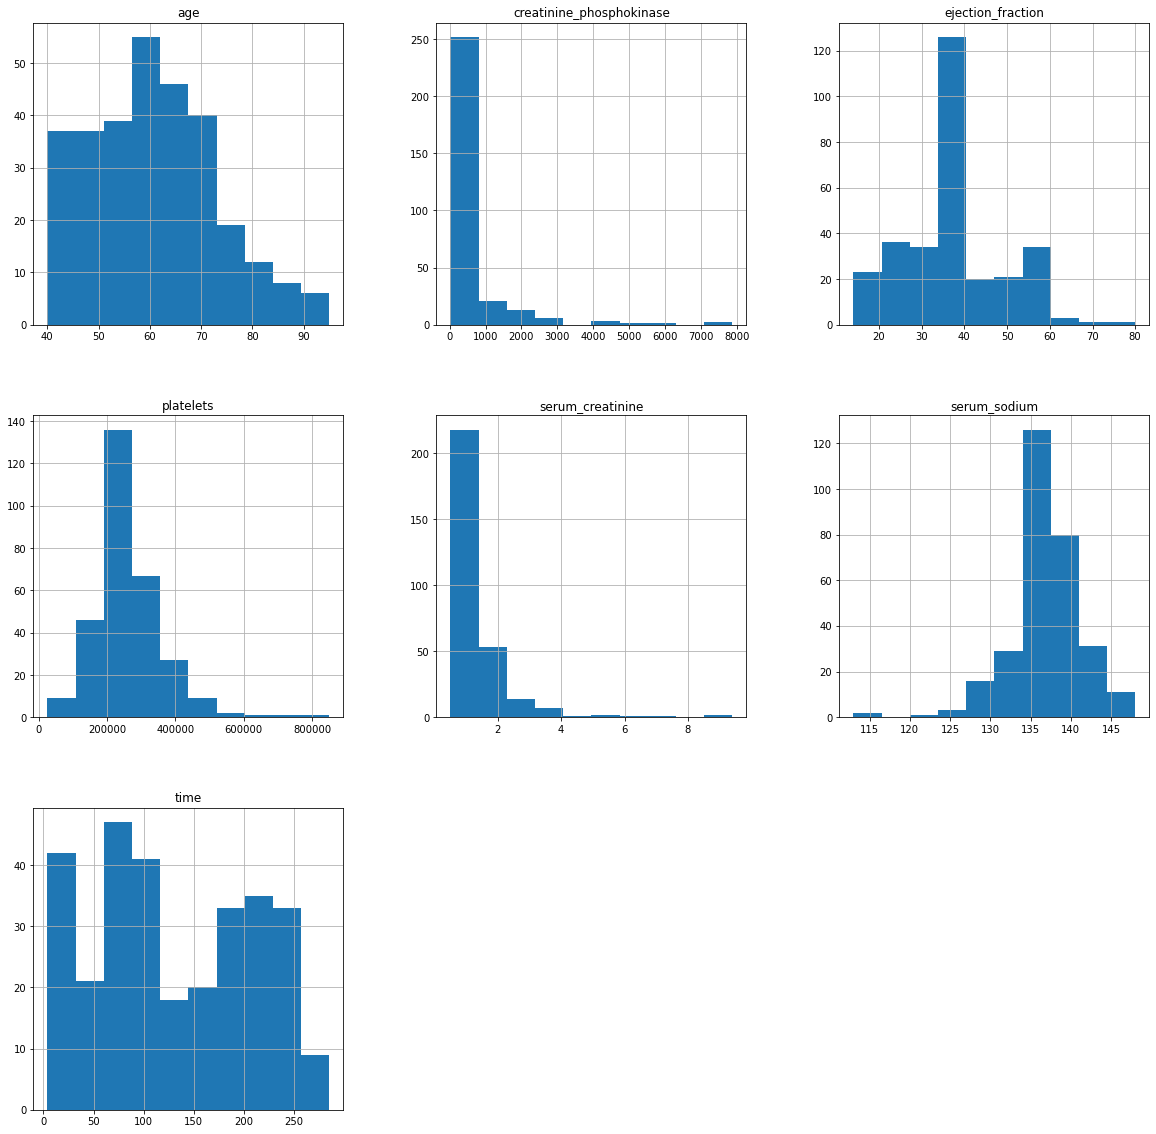

In [36]:
#melihat distribusi frekuensi dari data kontinu
df_kontinu.hist(figsize=(20,20))

In [37]:
#Deskripsi statistik fitur kontinuous
print('Age:\n',scipy.stats.describe(df['age'], ddof=1, bias=False))
print('\n Creatinine phosphokinase:\n',scipy.stats.describe(df['creatinine_phosphokinase'], ddof=1, bias=False))
print('\n Ejection Fraction:\n',scipy.stats.describe(df['ejection_fraction'], ddof=1, bias=False))
print('\n platelets:\n',scipy.stats.describe(df['platelets'], ddof=1, bias=False))
print('\n serum_creatinine\n',scipy.stats.describe(df['serum_creatinine'], ddof=1, bias=False))
print('\n serum_sodium:\n',scipy.stats.describe(df['serum_sodium'], ddof=1, bias=False))
print('\n time:\n',scipy.stats.describe(df['time'], ddof=1, bias=False))

Age:
 DescribeResult(nobs=299, minmax=(40.0, 95.0), mean=60.83389297658862, variance=141.48648290797067, skewness=0.4230619067286353, kurtosis=-0.18487053195417458)

 Creatinine phosphokinase:
 DescribeResult(nobs=299, minmax=(23, 7861), mean=581.8394648829432, variance=941458.5714574308, skewness=4.463110084653752, kurtosis=25.149046196580798)

 Ejection Fraction:
 DescribeResult(nobs=299, minmax=(14, 80), mean=38.08361204013378, variance=140.0634553657606, skewness=0.555382751697321, kurtosis=0.0414093598193892)

 platelets:
 DescribeResult(nobs=299, minmax=(25100.0, 850000.0), mean=263358.02926421404, variance=9565668749.448881, skewness=1.4623208382757793, kurtosis=6.209254515302209)

 serum_creatinine
 DescribeResult(nobs=299, minmax=(0.5, 9.4), mean=1.3938795986622072, variance=1.070211072703194, skewness=4.455995882049027, kurtosis=25.82823866113201)

 serum_sodium:
 DescribeResult(nobs=299, minmax=(113, 148), mean=136.62541806020067, variance=19.469955781015017, skewness=-1.048

- data pada fitur 'age' memiliki kemencengan positif dimana rata-rata umur dan mediannya lebuh besar dibandingkan modusnya namun, kemencengannya tidak terlalu kekanan dan masih mendekati normal.

- Creatinine phosphokinase pada pasien penyakit jantung berkisar diantara 23-7861 mcg/L, dengan rata-rata 581.84 mcg/L. Namun kadar creatinine phosphokinase pada pasien sangat beragam dan distribusi frekuensinya tidak normal.Kemencengannya kekanan(positive skewness)

- ejection fraction pada pasien penyakit jantung berkisar diantara 14%-80% dengan rata-rata 38%, yang mana menunjukan ejection fraction yang rendah. Normalnya ejection fraction berada diangka 53%-73%. Dapat diduga pasien penyakin jantung memiliki ejection fraction yang rendah

- data pada fitur platelet memiliki kemencengan ke kanan dan berbentuk kurva lepto kurtik. Namun kemencengannya tidak terlalu jauh dari distribusi normal. Pada data pasien penyakit jantung terdapat 25100-850000 kiloplatelets/ml dengan rata-rata 263358 yang menunjukan trombosit/platelet dalam darah pasien penyakit jantung cukup normal namun perlu dilihat lagi apakah jumlah trombosit/platelet dalam darah mempengaruhi mortalitasnya.

- Data pada fitur serum kreatinin cukup beragam dan kemencengannya ke kanan ( jauh dari normal) dengan rentang antara 0.5-9.4


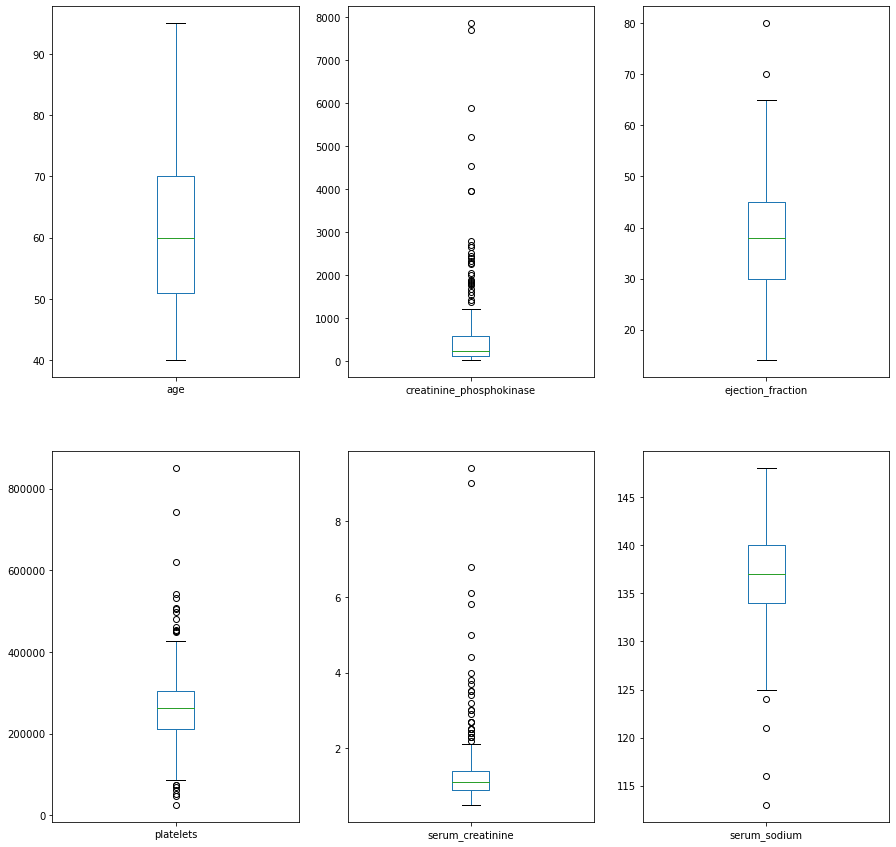

In [38]:
#melihat sebaran datanya melalui boxplot
fig=plt.figure(figsize=(15,15))
ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)
ax6=fig.add_subplot(2,3,6)
#membuat boxplot masing-masing fitur
df_kontinu[['age']].plot(kind='box', ax=ax1)
df_kontinu[['creatinine_phosphokinase']].plot(kind='box', ax=ax2)
df_kontinu[['ejection_fraction']].plot(kind='box', ax=ax3)
df_kontinu[['platelets']].plot(kind='box', ax=ax4)
df_kontinu[['serum_creatinine']].plot(kind='box', ax=ax5)
df_kontinu[['serum_sodium']].plot(kind='box', ax=ax6)
plt.show()

dari boxplot tersebut terdapat beberapa fitur yang memiliki banyak outlier seperti creatinine phosphokinase, platelets, dan serum_creatinine sehingga perlu di handle dengan metode yang sesuai.

creatinine_phosphokinase dan dan serum_creatinine memiliki distribusi data yang menceng ke kanan (positive skewness) serta seluruh outlier lebih besar dari batas atas outlier(high boundaries) sehingga outlier akan di remove karena membuat data menjadi tidak seimbang

sementara untuk fitur platelets, outlier akan dihandle dengan metode winsorize

In [39]:
#mencari nilai outlier pada fitur creatinine_phosphokinase
Q1_CP=df['creatinine_phosphokinase'].quantile(0.25)
Q3_CP=df['creatinine_phosphokinase'].quantile(0.75)
IQR_CP=1.5*(Q3_CP-Q1_CP)
low_CP=Q1_CP-IQR_CP
high_CP=Q3_CP+IQR_CP
print('batas bawah :', low_CP)
print('batas atas :', high_CP)
#melihat banyaknya data outlier
print('banyaknya outlier:',len(df[(df['creatinine_phosphokinase']<low_CP) | (df['creatinine_phosphokinase']>high_CP)]))


batas bawah : -581.75
batas atas : 1280.25
banyaknya outlier: 29


In [40]:
#mencari nilai outlier pada fitur serum_creatinine
Q1_SC=df['serum_creatinine'].quantile(0.25)
Q3_SC=df['serum_creatinine'].quantile(0.75)
IQR_SC=1.5*(Q3_SC-Q1_SC)
low_SC=Q1_SC-IQR_SC
high_SC=Q3_SC+IQR_SC
print('batas bawah :', low_SC)
print('batas atas :', high_SC)
#melihat banyaknya data outlier
print('banyaknya outlier:',len(df[(df['serum_creatinine']<low_SC) | (df['serum_creatinine']>high_SC)]))

batas bawah : 0.15000000000000024
batas atas : 2.1499999999999995
banyaknya outlier: 29


In [41]:
#mencari nilai outlier pada fitur platelets
Q1_P=df['platelets'].quantile(0.25)
Q3_P=df['platelets'].quantile(0.75)
IQR_P=1.5*(Q3_P-Q1_P)
low_P=Q1_P-IQR_P
high_P=Q3_P+IQR_P
#melihat banyaknya data outlier
len(df[(df['platelets']<low_P) | (df['platelets']>high_P)])

21

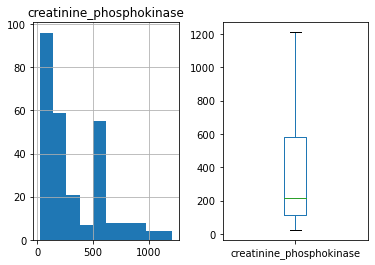

In [42]:
#menghandle outlier fitur creatinine_phosphokinase dengan meremove outlier
df=df[~((df['creatinine_phosphokinase']<low_CP) | (df['creatinine_phosphokinase']>high_CP))]
#melihat boxplot dan histogramnya
fig=plt.figure()
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
df[['creatinine_phosphokinase']].hist(ax=ax1)
df[['creatinine_phosphokinase']].plot(kind='box', ax=ax2)
plt.show()

In [43]:
df.shape

(270, 13)

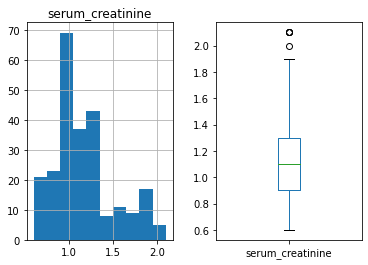

In [44]:
#menghandle outlier fitur serum_creatinine dengan meremove outlier
df=df[~((df['serum_creatinine']<low_SC) | (df['serum_creatinine']>high_SC))]
#melihat boxplot dan histogramnya
fig=plt.figure()
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
df[['serum_creatinine']].hist(ax=ax1)
df[['serum_creatinine']].plot(kind='box', ax=ax2)
plt.show()

In [45]:
df.shape

(243, 13)

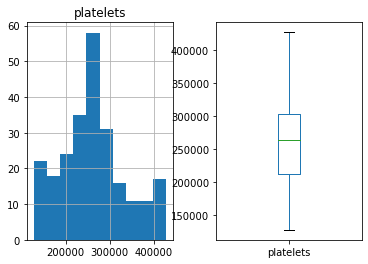

In [46]:
#menetapkan batasan nilai minimum dan maximum fitur data platelets
df['platelets']= winsorize(df['platelets'],(0.025,0.05))
#melihat boxplot dan histogramnya
fig=plt.figure()
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
df[['platelets']].hist(ax=ax1)
df[['platelets']].plot(kind='box', ax=ax2)
plt.show()

## Korelasi antar fitur

In [47]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1


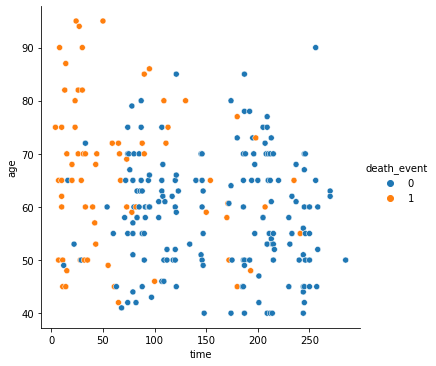

In [48]:
# Hubungan time dengan age terhadap death_event
sns.relplot(x='time', y='age',
            hue='death_event', data=df)

Dari sctter plot tersebut terlihat bahwa terdapat unbalenced data pada fitur death_event yang mana kejadian meninggal lebih sedikit dibanding yang survive. Namun ada pola yang juga terlihat yakni pasien yang meninggal kebanyakan periode follow up kurang dari 100 hari.

<AxesSubplot:>

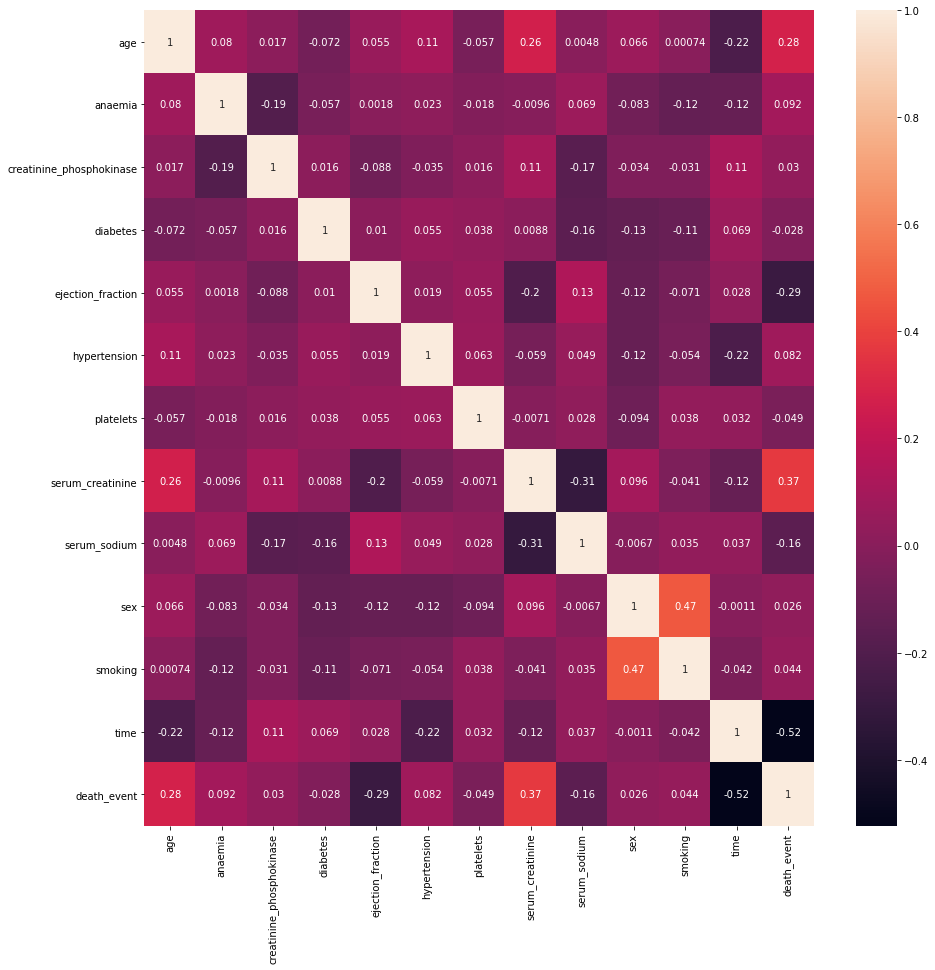

In [49]:
#melihat korelasi antar fitur
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

Terdapat hubungan positif yang kuat antara death_event dengan age dan serum_creatinine sedangkan terdapat hubungan negatif yang kuat antara death_event dengan time dan ejection_fraction

# Data Preprocessing

In [50]:
#memisahkan input dan output
x=df.drop(columns=['death_event'])
y=df['death_event']
#memisahkan data untuk training dan testing
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3)

# Defining Model

In [51]:
model=RandomForestClassifier(n_estimators=44)

Alasan pemilihan algoritma machine learning dengan menggunakan random forest karena mempertimbangkan cara kerja random forest yang memilih sample data secara acak dan membuat decision tree dari masing-masing sample tersbut kemudian output didapat dari rata-ratanya sehingga akan menghasilkan prediksi yang lebih akurat dan menghindri overfitting

nilai n pada n_estimators akan dievaluasi lagi untuk mendapatkan akurasi terbaik

# Model Training

In [52]:
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=44)

# Model Evaluation

In [53]:
y_pred=model.predict(x_test)
#melihat accuracynya
accuracy_score(y_test,y_pred)

0.863013698630137

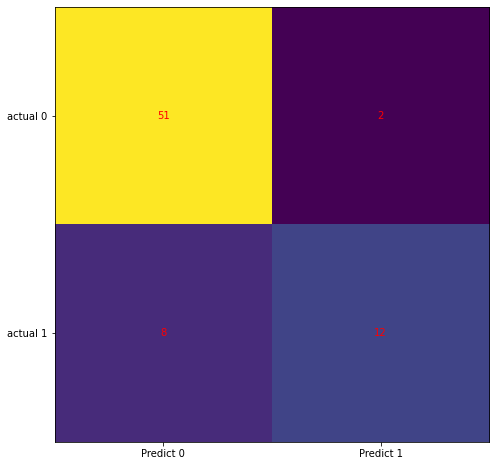

In [54]:
#melihat confussion matrix
cm=confusion_matrix(y_test, y_pred)
fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),
             ticklabels=('Predict 0','Predict 1'))
ax.yaxis.set(ticks=(0,1),
             ticklabels=('actual 0', 'actual 1'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center',
               color='red')
plt.show()

In [55]:
#melihat fitur impotance 
imp=pd.Series(model.feature_importances_, index=x.columns).sort_values(ascending=False)
imp

time                        0.343175
ejection_fraction           0.140812
serum_creatinine            0.130031
age                         0.090808
creatinine_phosphokinase    0.081797
platelets                   0.074632
serum_sodium                0.074263
smoking                     0.018259
diabetes                    0.014293
anaemia                     0.012836
sex                         0.011647
hypertension                0.007446
dtype: float64

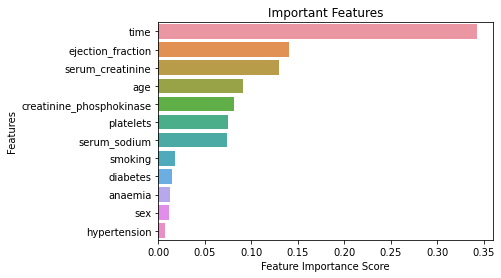

In [56]:
#memvisualisasikan fitur importance
sns.barplot(x=imp, y=imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features')
plt.show()

Dari grafik tersebut dapat disimpulkan bahwa kita dapat memprediksi death_event hanya dengan fitur data continuou dan fitur kategorikal yang digunakan hanya smoking. Maka fitur dengan data kategorikal seperti hypertension, anemia, sex, dan diabetes akan di drop

## Remodeling Classifier

In [70]:
x=df.drop(columns=['diabetes','sex','anaemia','hypertension','death_event'])
y=df['death_event']
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3)

In [72]:
model=RandomForestClassifier(n_estimators=44)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=44)

In [75]:
#menyimpan model untuk digunakan dalam deployment
pickle.dump(model,open('model_RF.pkl','wb'))

In [76]:
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.863013698630137

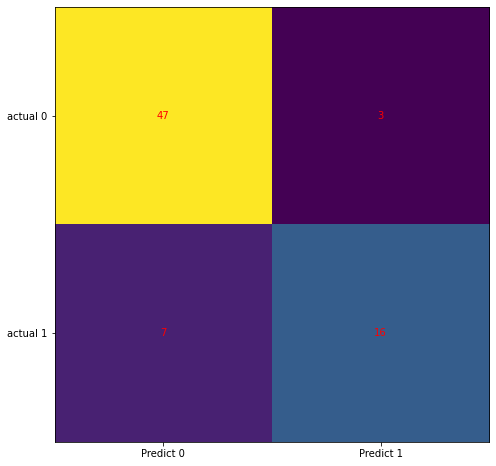

In [77]:
#melihat confussion matrix
cm=confusion_matrix(y_test, y_pred)
fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),
             ticklabels=('Predict 0','Predict 1'))
ax.yaxis.set(ticks=(0,1),
             ticklabels=('actual 0', 'actual 1'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center',
               color='red')
plt.show()

# Model Inference

In [ ]:
x.head()

In [79]:
age=float(input('umur :'))
creatin=float(input('Creatinine phosphokinase :'))
ejection=float(input('ejection fraction :'))
platelets=float(input('platelets :'))
serum_c=float(input('serum_creatinine:'))
serum_s=float(input('serum_sodium:'))
smoking=int(input('smoking'))
time=int(input('time :'))
x_input=[[age,creatin,ejection,platelets,serum_c,serum_s,smoking,time]]
x_input=scaler.fit_transform(x_input)
y_output=model.predict(x_input)
if y_output==0:
    print('tidak meninggal')
else:
    print('meninggal')

umur :65
Creatinine phosphokinase :150
ejection fraction :15
platelets :2650000
serum_creatinine:456
serum_sodium:56
smoking1
time :5
tidak meninggal


# Conclusion

- Beberapa fitur kategorikal memberikan informasi sebagai berikut :
1. Terdapat lebih banyak penderita penyakit jantung pria daripada wanita demikian juga yang meninggal lebih banyak pria dibanding wanita
2. Wanita yang merokok hanya ada sebanyak 1.3%
3. Pasien yang meninggal selama masa follow up paling banyak menderita dua diantara tiga penyakit ( anaemia, diabetes, hipertensi)
- Pada fitur data kontinu beberapa fitur tidak bedistribusi normal dan memiliki banyak outlier, sehingga beberapa outlier pada fitur dihapus dari baris data dan ada yang dihandle dengan winsorize.
- Untuk memprediksi meninggal/tidaknya pasien penyakit jantung dapat di lakukan cukup dengan fitur-fitur data kontinu seperti creatinine phosphokinase, ejection fraction, platelets, serum creatinine, serum sodium, dan time namun, disisipkan fitur kategorikal smoking